In [2]:
import pandas as pd
input_file = 'wine.csv'
wine = pd.read_csv(input_file) 
wine.head(5)


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(wine)
data_transformed = mms.transform(wine)

In [14]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

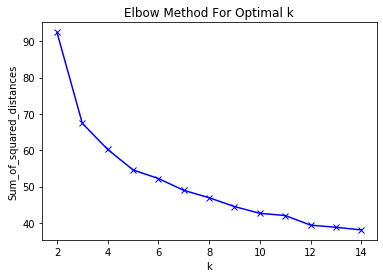

In [15]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#According to the elbow graph above, optimal number of clusters is 4

In [16]:
#Design K means algorithm
kmeans = KMeans(n_clusters=3, random_state=1234).fit(wine) 
pd.Series(kmeans.labels_).value_counts() 


1    69
2    62
0    47
dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
# Make a comparison between actual wine type and the predicted one
confusion_matrix(kmeans.labels_, wine['Wine']-1) 


array([[46,  1,  0],
       [ 0, 50, 19],
       [13, 20, 29]], dtype=int64)

In [18]:
accuracy_score(kmeans.labels_, wine['Wine']-1)*100 


70.2247191011236

In [19]:
#Part 3, Decision Tree for Wine Dataset
import numpy as np 
from sklearn.model_selection import train_test_split 
y = kmeans.labels_ 
X = wine.drop(['Wine'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)


In [20]:
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
model = tree.DecisionTreeClassifier() 
model = model.fit(X_train, y_train)


In [21]:
y_predict = model.predict(X_test)

In [22]:
#Create a dot file
from sklearn.tree import export_graphviz  

export_graphviz(model, out_file ='tree.dot', feature_names =X.columns)


In [23]:
np.corrcoef(y_test,y_predict)

array([[1., 1.],
       [1., 1.]])

In [24]:
from sklearn.metrics import mean_squared_error 
RMSE = mean_squared_error(y_predict, y_test)**0.5 
RMSE

0.0

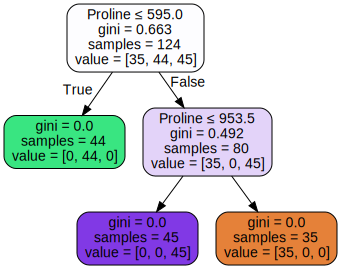

In [25]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,  
feature_names=X.columns,filled=True, rounded=True, special_characters=True)    
graph = graphviz.Source(dot_data)   
graph  